# https://www.kaggle.com/datasets/adilshamim8/daily-food-and-nutrition-dataset

I chose this dataset because I like food and this has a useability of 10. For each food item, it has the category of food and dietary info about it.

Do the amounts of nutritional components correlate to each other?

Does the category relate to nutritional make-up?

In [ ]:
### Import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import re
# Don't display deprecation warnings, etc
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.cluster import KMeans
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier, plot_tree
from sklearn.metrics import r2_score, mean_squared_error, accuracy_score, confusion_matrix, classification_report

from google.colab import files
uploaded = files.upload()

import io
df = pd.read_csv(io.BytesIO(uploaded['daily_food_nutrition_dataset_modified.csv']))

Saving daily_food_nutrition_dataset_modified.csv to daily_food_nutrition_dataset_modified.csv


In [ ]:
### Cleaning
# Some of the rows were shifted to the right by one because they had to specify
# extra info about the food product along with the measurement all of them had,
# both with parentheses; just manually corrected in Excel
# Pre-sorted by Food_Item and duplicates removed using Excel

print("Null values per column:" )
print(df.isnull().sum())
df.dropna()
print('Number of duplicates: ', df.duplicated().sum())

# To make sure there's no duplicates
df = df.drop_duplicates().reset_index(drop = True)

print('Missing values left:', df.isna().any().any())
print('Dimensions:', df.shape)

# To extra make sure it's sorted
df.sort_values(by = 'Food_Item', inplace = True)

df

Null values per column:
Food_Item            0
Category             0
Calories (kcal)      0
Protein (g)          0
Carbohydrates (g)    0
Fat (g)              0
Fiber (g)            0
Sugars (g)           0
Sodium (mg)          0
Cholesterol (mg)     0
Meal_Type            0
Water_Intake (ml)    0
dtype: int64
Number of duplicates:  0
Missing values left: False
Dimensions: (597, 12)


,Food_Item,Category,Calories (kcal),Protein (g),Carbohydrates (g),Fat (g),Fiber (g),Sugars (g),Sodium (mg),Cholesterol (mg),Meal_Type,Water_Intake (ml)
0,Acai Bowl (1 serving),Meal/Fruit,350,5.0,60.0,12.0,10.0,30.0,40,0,Breakfast,250
1,Aioli (Garlic 1 tbsp),Condiment,95,0.1,0.5,10.5,0.0,0.1,70,5,Dinner,0
2,Aji Amarillo Paste (1 tsp),Condiment,5,0.1,1.0,0.0,0.5,0.5,50,0,Dinner,0
3,Alfajores (1 cookie),Dessert,180,2.0,22.0,10.0,1.0,15.0,60,20,Snack,0
4,Almond Milk (Unsweetened 1 cup),Beverage/Dairy-Alt,30,1.0,1.0,2.5,1.0,0.0,160,0,Breakfast,240
...,...,...,...,...,...,...,...,...,...,...,...,...
592,White Wine Sauce (1/4 cup),Condiment,80,1.0,4.0,6.0,0.5,2.0,300,5,Dinner,0
593,Whole Wheat Toast (1 slice),Grain,80,4.0,14.0,1.0,2.0,2.0,140,0,Breakfast,0
594,Wild Rice (1 cup cooked),Grain,166,6.5,35.0,0.6,3.0,1.2,5,0,Dinner,0
595,Yellow Rice (1 cup),Grain,230,4.0,50.0,1.0,2.0,1.0,300,0,Dinner,0


--- Info ---
Breakfast --- 
Max: 600 
75%ile: 175.0 
50%ile: 102.0 
25%ile: 50.0 
Min: 0
Lunch --- 
Max: 650 
75%ile: 216.25 
50%ile: 110.0 
25%ile: 30.0 
Min: 0
Dinner --- 
Max: 680 
75%ile: 230.0 
50%ile: 103.0 
25%ile: 34.0 
Min: 0
Snack --- 
Max: 450 
75%ile: 170.0 
50%ile: 100.0 
25%ile: 48.5 
Min: 0
Side --- 
Max: 22 
75%ile: 22.0 
50%ile: 22.0 
25%ile: 22.0 
Min: 22
Overall --- 
Max: 680 
75%ile: 200.0 
50%ile: 103.0 
25%ile: 40.0 
Min: 0


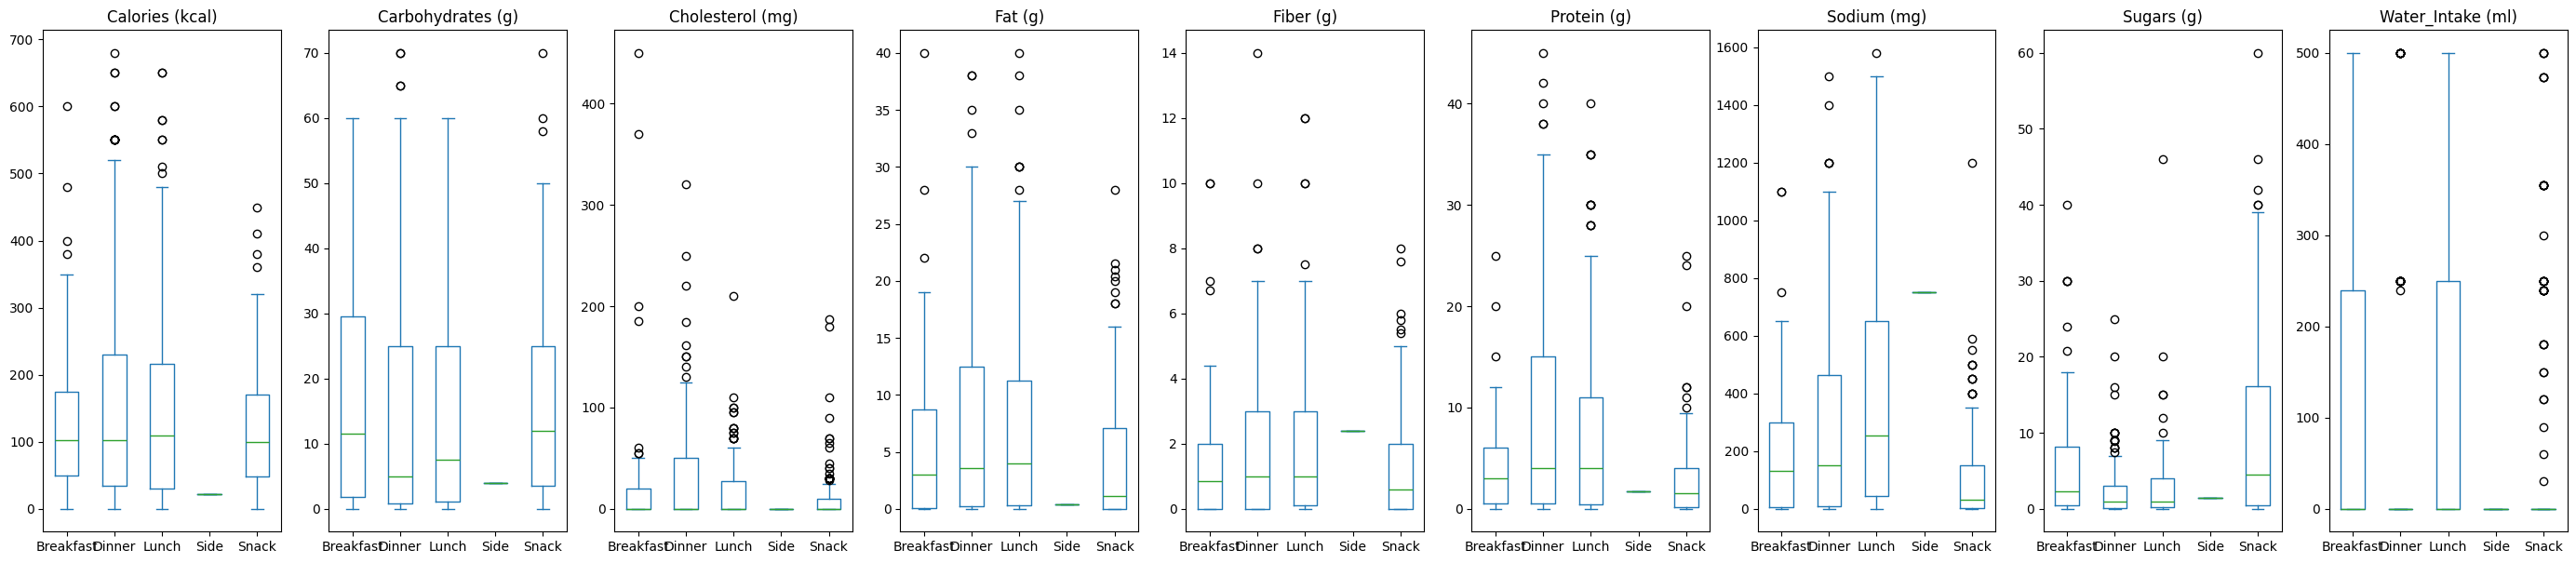

In [ ]:
### Data Viz
# Scaled the graphs the same
# Only 'Side' is Kimchi

# Box Plot by Meal_Type
df.plot.box(figsize = (35,7), by = 'Meal_Type')


# Displays Info for each Meal_Type b/c df.describe not working here
print('--- Info ---')
for i in ['Breakfast', 'Lunch', 'Dinner', 'Snack', 'Side']:
  print(i, '---', '\n'
        'Max:', df[df['Meal_Type'] == i]['Calories (kcal)'].max(), '\n'
        '75%ile:', df[df['Meal_Type'] == i]['Calories (kcal)'].quantile(.75), '\n'
        '50%ile:', df[df['Meal_Type'] == i]['Calories (kcal)'].quantile(.50), '\n'
        '25%ile:', df[df['Meal_Type'] == i]['Calories (kcal)'].quantile(.25), '\n'
        'Min:', df[df['Meal_Type'] == i]['Calories (kcal)'].min())
print('Overall', '---', '\n'
      'Max:', df['Calories (kcal)'].max(), '\n'
      '75%ile:', df['Calories (kcal)'].quantile(.75), '\n'
      '50%ile:', df['Calories (kcal)'].quantile(.50), '\n'
      '25%ile:', df['Calories (kcal)'].quantile(.25), '\n'
      'Min:', df['Calories (kcal)'].min())

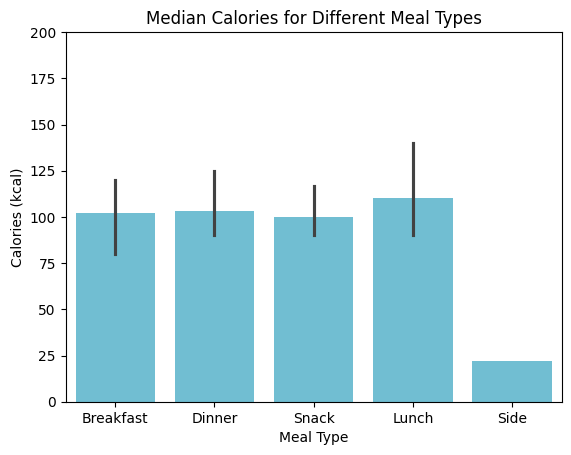

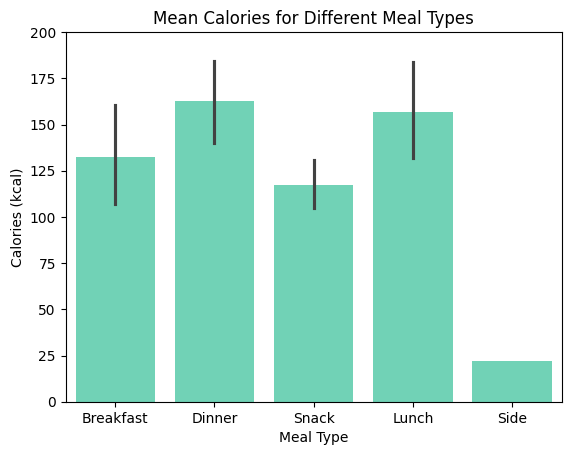

In [ ]:
### Median
sns.barplot(data = df, x = 'Meal_Type', y = 'Calories (kcal)', errorbar = ('ci', 95), estimator = np.median, color = '#61c7e2')
plt.title('Median Calories for Different Meal Types')
plt.xlabel('Meal Type'); plt.ylabel('Calories (kcal)')
plt.ylim(0, 200)
plt.show()

### Mean
sns.barplot(data = df, x = 'Meal_Type', y = 'Calories (kcal)', errorbar = ('ci', 95), estimator = np.mean, color = '#61e2bd')
plt.title('Mean Calories for Different Meal Types')
plt.xlabel('Meal Type'); plt.ylabel('Calories (kcal)')
plt.ylim(0, 200)
plt.show()

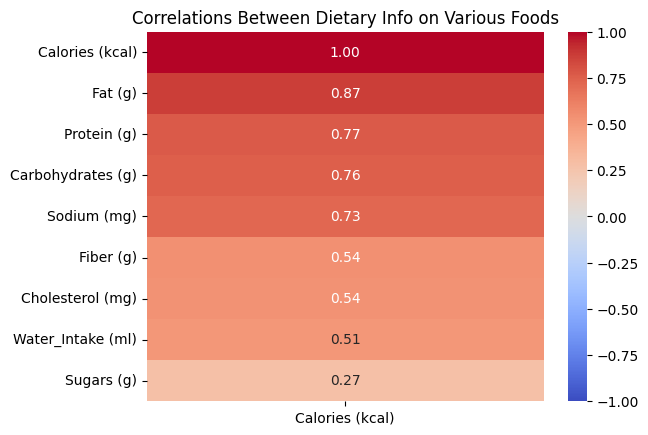

In [ ]:
### Heatmap
# Select only numeric columns
metrics = df.copy().select_dtypes(include = np.number)

corr = metrics.corr()

# Show only 'Calories (kcal)' column
sns.heatmap(corr[['Calories (kcal)']].sort_values(by = 'Calories (kcal)', ascending = False),
            annot = True, cmap = 'coolwarm', fmt = '.2f', vmin = -1, vmax = 1)
plt.title('Correlations Between Dietary Info on Various Foods')
plt.show()

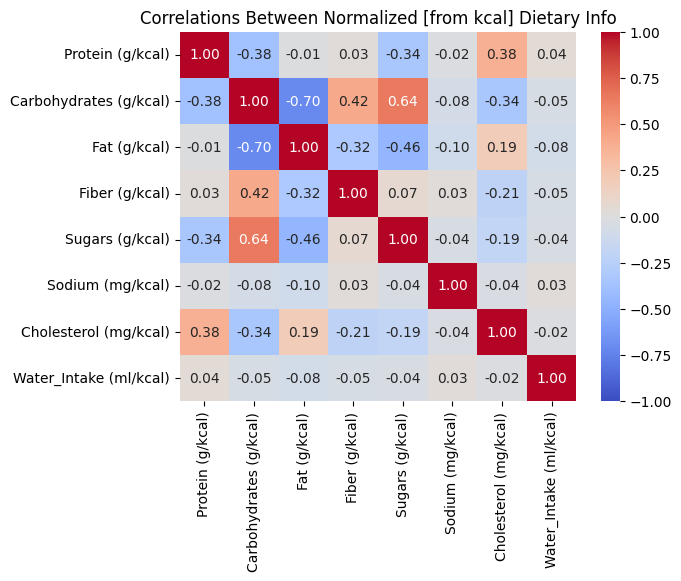

In [ ]:
### Normalize Everything Based on kcal
# As float to prevent deprecation warnings
normed = metrics.copy().astype(float)

# Reverses list so it won't set Cals to 1 first, dividing everything else by 1
# df.at[Index, Column_Name] selects individual entrys
for j in list(normed.columns)[::-1]:
  for i in range(len(normed)):
    if normed.at[i, 'Calories (kcal)'] != 0:
      normed.at[i, j] = normed.at[i, j] / normed.at[i, 'Calories (kcal)']

# Rename columns to reflect normalization
normed.columns = normed.columns.str.replace(')', '/kcal)')

### Heatmap After Normalization
corr = normed.corr()

# Hide 'Calories (kcal/kcal)' row + column
sns.heatmap(corr.drop('Calories (kcal/kcal)', axis = 0).drop('Calories (kcal/kcal)', axis = 1),
            annot = True, cmap = 'coolwarm', fmt = '.2f', vmin = -1, vmax = 1)
plt.title('Correlations Between Normalized [from kcal] Dietary Info')
plt.show()

# Observations/Hypotheses
- Lunch and Dinner is generally higher calorie than Breakfast, Snack, or Side [Kimchi]
- The caloric data is skewed upwards; the difference between max and 75%ile is much greater than the difference between 25%ile and min in every Meal_Type
- Caloric amount is positively correlated with every variable except maybe Sugar
[Based off Unscaled]
- Fat and Carbs are negatively correlated [Based off Scaled]
- Sugars and Carbs are positively correlated [Based off Scaled], which makes sense because sugar is a carb
- Apparently fiber is a carb, so that's why they're positively correlated too
- Protein and Cholesterol are somehat positively correlated b/c some meats are high in both
- The Unscaled Heat Map is useful for correlations b/w Calories and another var,
while Scaled Heat Map is useful for the rest b/c normalization removes Calories
as a possible indirect var that skews the #s, while doing that when Calories is a direct variable wouldn't make sense.

In [ ]:
### Filtering Category Including Doubles;
# Others Trivial To Filter
# List of all possible categories excluding 'Meal'
Z = ['Meal', 'Vegetable', 'Meat', 'Processed', 'Grain', 'Protein',
    'Legume', 'Condiment', 'Snack', 'Dessert', 'Fruit', 'Seafood', 'Fish',
    'Dairy', 'Nut', 'Dairy-Alt', 'Beverage', 'Pasta', 'Rice', 'Protein',
    'Seafood', 'Soup', 'Vegetarian', 'Appetizer', 'Supplement']

dfCatBin = df.copy()

for Filter in Z:
  dfCatBin[Filter] = False
  for i in df.itertuples():
    if len(re.findall(Filter, str(i.Category))) != 0:
      dfCatBin.at[i.Index, Filter] = True

Filter = 'Meal'
# List Comp over every index where the filter is found in Category entry
x = [i.Index for i in df.itertuples() if len(re.findall(Filter, str(i.Category))) != 0]

# Add every row in df corresponding to index in x to new df
dfPartial = pd.concat([df[df.index == j] for j in x], ignore_index = True)

dfCatBin

,Food_Item,Category,Calories (kcal),Protein (g),Carbohydrates (g),Fat (g),Fiber (g),Sugars (g),Sodium (mg),Cholesterol (mg),...,Dairy,Nut,Dairy-Alt,Beverage,Pasta,Rice,Soup,Vegetarian,Appetizer,Supplement
0,Acai Bowl (1 serving),Meal/Fruit,350,5.0,60.0,12.0,10.0,30.0,40,0,...,False,False,False,False,False,False,False,False,False,False
1,Aioli (Garlic 1 tbsp),Condiment,95,0.1,0.5,10.5,0.0,0.1,70,5,...,False,False,False,False,False,False,False,False,False,False
2,Aji Amarillo Paste (1 tsp),Condiment,5,0.1,1.0,0.0,0.5,0.5,50,0,...,False,False,False,False,False,False,False,False,False,False
3,Alfajores (1 cookie),Dessert,180,2.0,22.0,10.0,1.0,15.0,60,20,...,False,False,False,False,False,False,False,False,False,False
4,Almond Milk (Unsweetened 1 cup),Beverage/Dairy-Alt,30,1.0,1.0,2.5,1.0,0.0,160,0,...,True,False,True,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
592,White Wine Sauce (1/4 cup),Condiment,80,1.0,4.0,6.0,0.5,2.0,300,5,...,False,False,False,False,False,False,False,False,False,False
593,Whole Wheat Toast (1 slice),Grain,80,4.0,14.0,1.0,2.0,2.0,140,0,...,False,False,False,False,False,False,False,False,False,False
594,Wild Rice (1 cup cooked),Grain,166,6.5,35.0,0.6,3.0,1.2,5,0,...,False,False,False,False,False,False,False,False,False,False
595,Yellow Rice (1 cup),Grain,230,4.0,50.0,1.0,2.0,1.0,300,0,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
dfCatBin.info()

<class 'pandas.core.frame.DataFrame'>
Index: 597 entries, 0 to 596
Data columns (total 35 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Food_Item          597 non-null    object 
 1   Category           597 non-null    object 
 2   Calories (kcal)    597 non-null    int64  
 3   Protein (g)        597 non-null    float64
 4   Carbohydrates (g)  597 non-null    float64
 5   Fat (g)            597 non-null    float64
 6   Fiber (g)          597 non-null    float64
 7   Sugars (g)         597 non-null    float64
 8   Sodium (mg)        597 non-null    int64  
 9   Cholesterol (mg)   597 non-null    int64  
 10  Meal_Type          597 non-null    object 
 11  Water_Intake (ml)  597 non-null    int64  
 12  Meal               597 non-null    bool   
 13  Vegetable          597 non-null    bool   
 14  Meat               597 non-null    bool   
 15  Processed          597 non-null    bool   
 16  Grain              597 non-null